In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
try:
    #
    df = pd.read_csv('../data/heart_disease.csv', header=None)
    print("Dataset loaded successfully.")

    
    column_names = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]
    df.columns = column_names
    print("Column names have been assigned to the DataFrame.")

except FileNotFoundError:
    print("Error: 'heart_disease.csv' not found. Please ensure the file is in the correct directory.")
    
    print("Creating a dummy dataframe for demonstration purposes.")
    data = {
        'age': np.random.randint(29, 77, 303),
        'sex': np.random.randint(0, 2, 303),
        'cp': np.random.randint(0, 4, 303),
        'trestbps': np.random.randint(94, 200, 303),
        'chol': np.random.randint(126, 564, 303),
        'fbs': np.random.randint(0, 2, 303),
        'restecg': np.random.randint(0, 3, 303),
        'thalach': np.random.randint(71, 202, 303),
        'exang': np.random.randint(0, 2, 303),
        'oldpeak': np.random.uniform(0, 6.2, 303),
        'slope': np.random.randint(0, 3, 303),
        'ca': np.random.randint(0, 5, 303),
        'thal': np.random.randint(0, 4, 303),
        'target': np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)

Dataset loaded successfully.
Column names have been assigned to the DataFrame.


In [43]:
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

print("\n--- Dataset Information ---")
df.info()


--- First 5 Rows of the Dataset ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
1   63    1   1       145   233    1        2      150      0      2.3      3   
2   67    1   4       160   286    0        2      108      1      1.5      2   
3   67    1   4       120   229    0        2      129      1      2.6      2   
4   37    1   3       130   250    0        0      187      0      3.5      3   

    ca  thal target  
0   ca  thal    num  
1  0.0   6.0      0  
2  3.0   3.0      2  
3  2.0   7.0      1  
4  0.0   3.0      0  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       304 non-null    object
 1   sex       304 non-null    object
 2   cp        304 non-null    object
 3   trestbps  304 n

In [44]:
df.replace('?', np.nan, inplace=True)

In [45]:
print("\n--- Missing Values Before Imputation ---")
print(df.isnull().sum())


--- Missing Values Before Imputation ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [46]:
for col in df.columns:
    if df[col].isnull().any():
        # Convert column to numeric if it's not, coercing errors
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())


--- Missing Values After Imputation ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [47]:
sns.set_style('whitegrid')

In [50]:
print("\n--- Ensuring all data is numeric for correlation matrix ---")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows that might have NaN values after coercion (e.g., a header row read as data)
df.dropna(inplace=True)


--- Ensuring all data is numeric for correlation matrix ---


C:\Users\ahmed\AppData\Local\Temp\ipykernel_4188\3206870609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


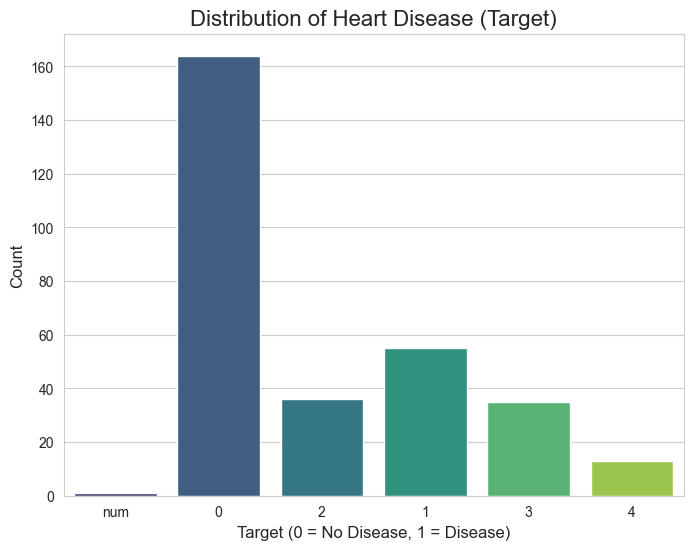

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease (Target)', fontsize=16)
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [53]:
print("\n--- Ensuring all data is numeric for correlation matrix ---")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

df['target'] = df['target'].astype(int)


--- Ensuring all data is numeric for correlation matrix ---


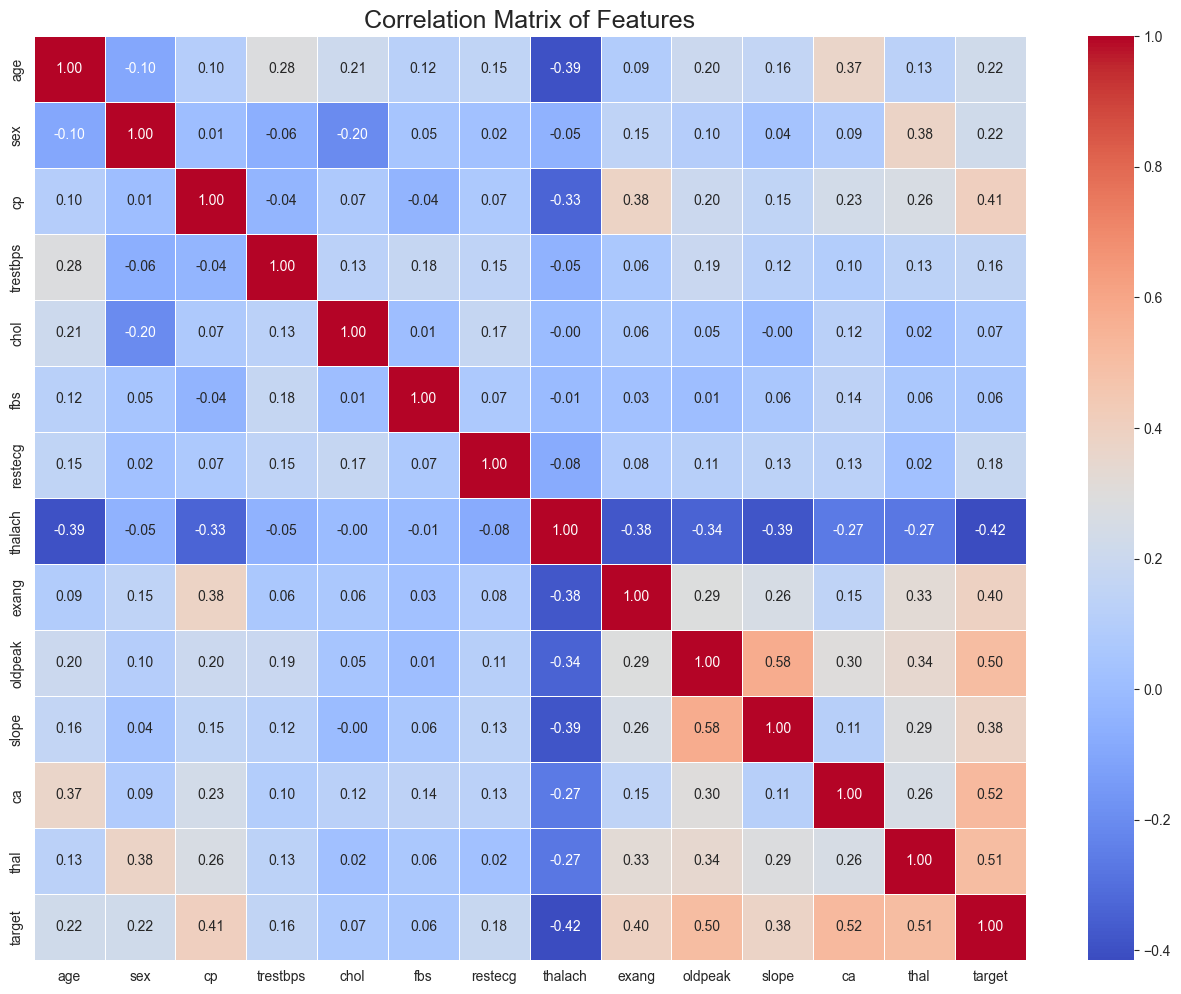

In [54]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.show()

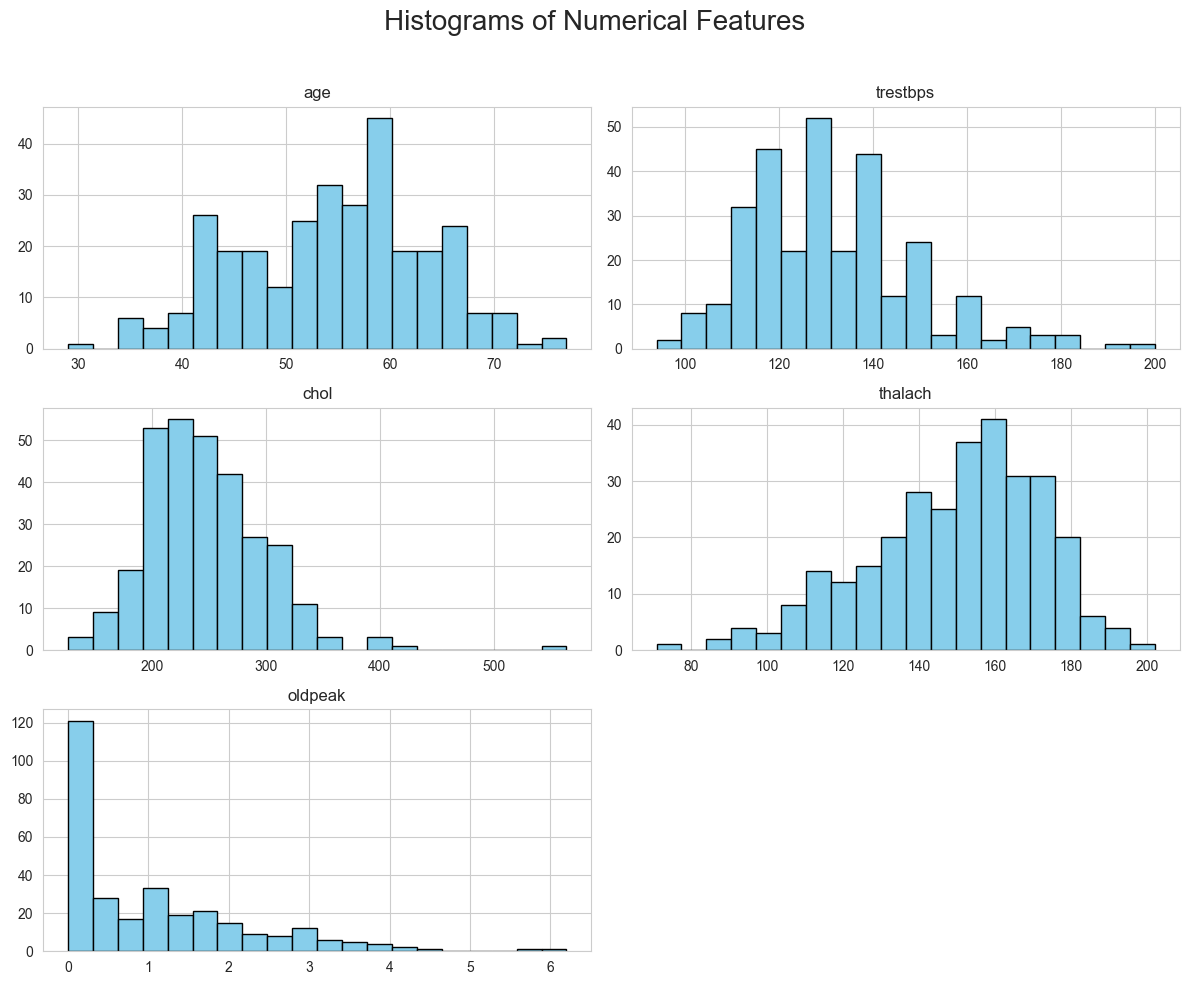

In [55]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

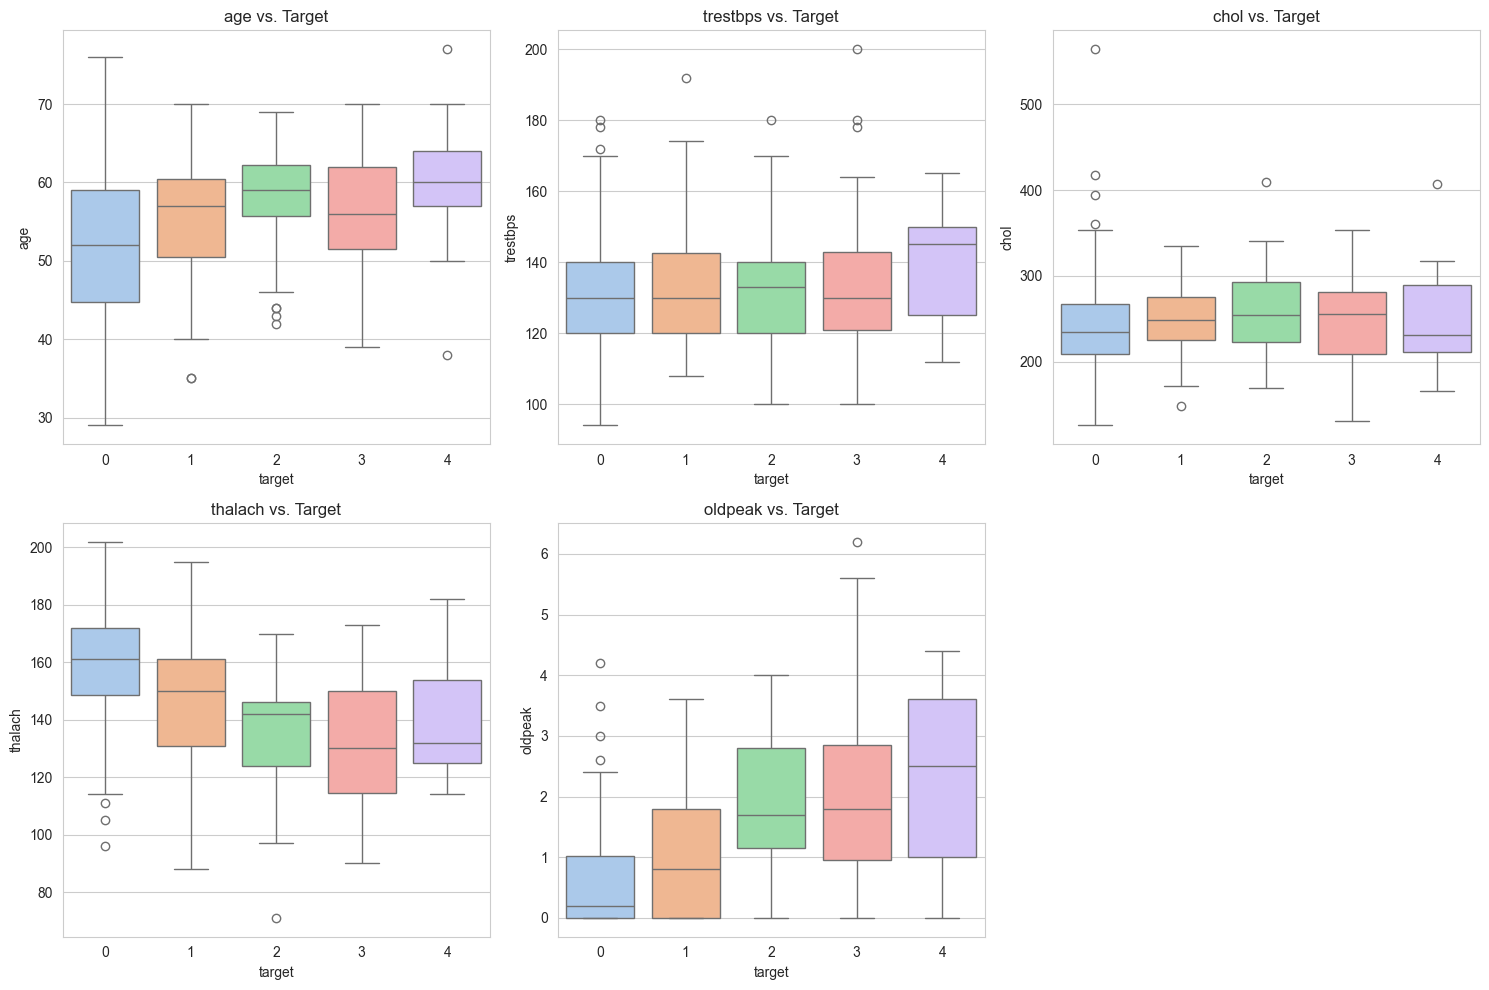

In [57]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df, palette='pastel', hue='target', legend=False)
    plt.title(f'{col} vs. Target')
plt.tight_layout()
plt.show()

In [58]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\n--- First 5 Rows of Scaled Features (X) ---")
print(X.head())


--- First 5 Rows of Scaled Features (X) ---
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
1  0.948726  1.0  1.0  0.757525 -0.264900  1.0      2.0  0.017197    0.0   
2  1.392002  1.0  4.0  1.611220  0.760415  0.0      2.0 -1.821905    1.0   
3  1.392002  1.0  4.0 -0.665300 -0.342283  0.0      2.0 -0.902354    1.0   
4 -1.932564  1.0  3.0 -0.096170  0.063974  0.0      0.0  1.637359    0.0   
5 -1.489288  0.0  2.0 -0.096170 -0.825922  0.0      2.0  0.980537    0.0   

    oldpeak  slope   ca  thal  
1  1.087338    3.0  0.0   6.0  
2  0.397182    2.0  3.0   3.0  
3  1.346147    2.0  2.0   7.0  
4  2.122573    3.0  0.0   3.0  
5  0.310912    1.0  0.0   3.0  


In [59]:
cleaned_df = pd.concat([X, y], axis=1)
cleaned_df.to_csv('../data/heart_disease_cleaned.csv', index=False)
print("\nCleaned and preprocessed data saved to 'heart_disease_cleaned.csv'")


Cleaned and preprocessed data saved to 'heart_disease_cleaned.csv'
